# **가설 5** : 교육과정, 입시제도의 변화와 사교육, 학업 성취도의 관계
매번 정권이 바뀌면서 우리나라의 교육과정은 잦은 풍파를 맞이한다. 

2006년 제 7차 교육과정이 개정된 이후 급변하는 교육과정에 날선 시선이 집중되었고, 정부는 이를 회피하기 위해 09개정, 15개정, 22개정 등의 연도별 개정으로 명칭만 바꾼채로 빈번한 개정을 시행했다.

논란이 되거나 큰 사건으로는 점점 줄어드는 수학 과목 시험 범위, 국어, 영어 수준별 평가(A/B형) 진행, 한국사 필수과목 및 절대평가 진행, 영어 절대평가 진행, 문이과 통합 및 수학 선택과목 다변화 등이 있다. 

입시제도 역시 논술제도의 축소, 수능 최저등급의 감소, 정시와 수시 비율의 변화 등 다양한 변화가 진행된다.

이에 따라 여러가지 가설을 세울 수 있는데, 가령 수학 범위가 줄어들었으니 수학에 대한 부담이 줄어들어 사교육비가 줄어들거나, 학업 성취도에 변화가 있을 것이다 등 따위다.

그러나 위의 가설은 틀렸다. 코로나로 인해서인지 알 수는 없으나, 최근 사교육비가 반등했다는 뉴스가 한 번 휩쓸고 갔다. 

이처럼 '교육과정과 입시제도의 변화'는 사교육비와 학업 성취도 데이터 등으로 입증되거나 반증될 수 있는데, 우리나라의 주된 교육과정 변천사를 통해 여러 가설을 세워보고 이를 증명해보고자 한다.

가설은 아래와 같다.(수정 중)

> **가설 5-1 :** 영어 절대 평가는 학생의 영어 성취도를 낮추고, 국어 수학 등 타과목 사교육비를 증대시켜 총 사교육비의 총량은 변함이 없을 것이다.

=> 영어 성취도도 낮추고, 영어 사교육비도 늘어났다.

> **가설 5-2 :** 점점 범위가 줄어드는 수학 범위는 수학 성취도를 낮추고 수학 사교육비를 감소시켜 총 사교육비의 총량은 감소할 것이다.

=> 수학 성취도도 낮추고, 수학 사교육비도 늘어났다.

> **가설 5-3 :** 2016년에는 무슨 일이 있었기에, 사교육 참가율은 반등하고 학업 성취도는 하락했는가?

=> 추측 1. 인강 시장의 대두(메가스터디 주가)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt
from glob import glob

In [2]:
file_names = sorted(glob('dataset/2011*.xlsx'))
file_names

['dataset\\2011~2020 학업성취도 평가 고등학생.xlsx',
 'dataset\\2011~2020 학업성취도 평가 중학생.xlsx']

## 2011~2020 학업 성취도 평가 EDA
**데이터 소개**
- 평가원에서 매년 발간되는 교육 평가 보고서에서 가져옴
- 중학교 3학년과 고등학교 1학년을 대상으로 매년 진행되는 학업 성취도 평가 데이터(집계자료)
- 2009~2015년은 전수조사, 2016년~2020년은 표본조사가 진행됨(2016년 1.5%, 나머진 3% 표본)
- 2021년 자료는 아직 집계되지 않음(평가원왈 연내발간예정)
- sheets : 전체, 성별, 지역별
- columns : 학력수준, 연도, 국어, 수학, 영어, 성별(성별 sheet), 지역별(지역별 sheet)
- '학력수준'의 경우 '우수학력', '보통학력', '기초학력', '기초학력 미달'로 표기되었으나 2020년부터 제4수준~제1수준으로 변경됨

In [3]:
sheets = ['전체', '성별', '지역별']
columns = ['학력수준', '연도', '국어', '수학', '영어'] # 공통 columns

### 중학교 학업 성취도 평가 EDA
**변수명**
- mid_achieve_all : 중학생 학업 성취도(melt)
- mid_grafe : 중학생 학업성취도(학력수준별)

In [4]:
mid_achieve_all = pd.read_csv('dataset_eda/중학생 학업성취도(melt).csv')
mid_grade = pd.read_csv('dataset_eda/중학생 학업성취도(학력수준별).csv')

중학생 학력 수준에 대한 전반적 시각화
- 대체로 국어를 잘하는 편이며 수학을 어려워 하는 경향을 보임
- 2020년에 들어 '국어' 학력이 떨어지는 경향이 고조됨
- '학력우수'와 '기초학력 미달' 학생 간의 양극화 경향이 보임
- '보통이상'의 학생이 줄어들고 '기초이하'의 학생이 즐어드는 경향을 보임

<AxesSubplot:xlabel='학력수준', ylabel='비율'>

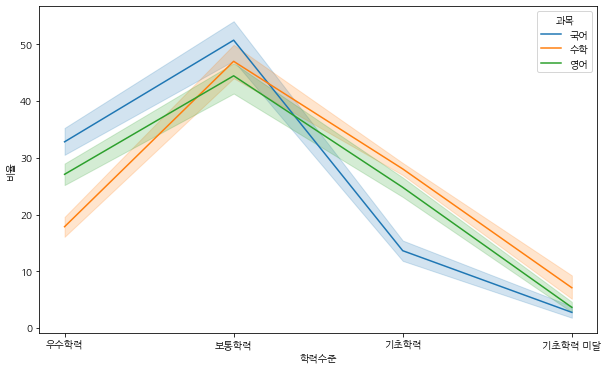

In [5]:
plt.figure(figsize=(10,6))
sns.lineplot(data=mid_achieve_all, x='학력수준', y='비율', hue="과목")

Text(0.5, 1.0, '2011~2020 중학생 학업성취도(기초학력 미달)')

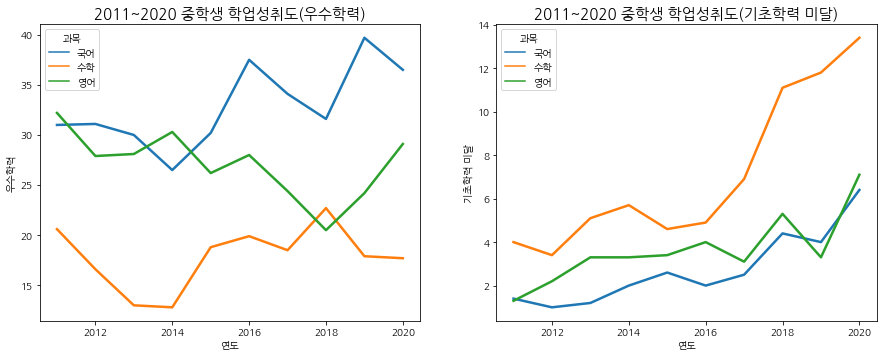

In [6]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.lineplot(data=mid_grade, x='연도', y='우수학력', hue='과목', linewidth=2.5)
plt.title('2011~2020 중학생 학업성취도(우수학력)', fontsize=15)

plt.subplot(222)
sns.lineplot(data=mid_grade, x='연도', y='기초학력 미달', hue='과목', linewidth=2.5)
plt.title('2011~2020 중학생 학업성취도(기초학력 미달)', fontsize=15)

Text(0.5, 1.0, '2011~2020 중학생 학업성취도(기초이하)')

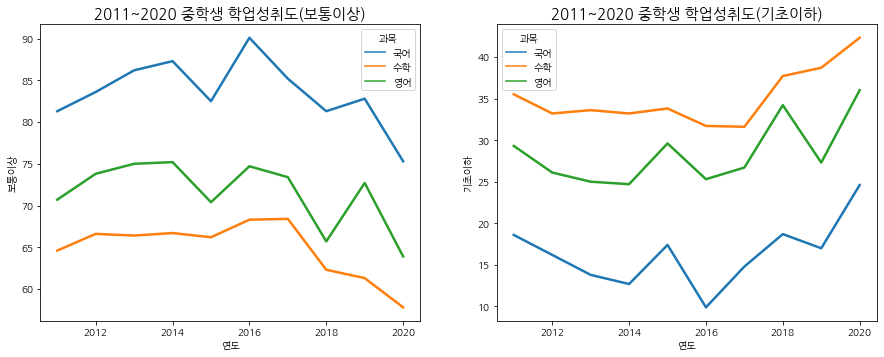

In [7]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.lineplot(data=mid_grade, x='연도', y='보통이상', hue='과목', linewidth=2.5)
plt.title('2011~2020 중학생 학업성취도(보통이상)', fontsize=15)

plt.subplot(222)
sns.lineplot(data=mid_grade, x='연도', y='기초이하', hue='과목', linewidth=2.5)
plt.title('2011~2020 중학생 학업성취도(기초이하)', fontsize=15)

### 고등학교 학업 성취도 평가 EDA
**변수명**
- high_grade : 고등학생 학업성취도(학력수준별).csv
- high_achieve_all : 고등학생 학업성취도(melt).csv

In [8]:
high_grade = pd.read_csv('dataset_eda/고등학생 학업성취도(학력수준별).csv')
high_achieve_all = pd.read_csv('dataset_eda/고등학생 학업성취도(melt).csv')

고등학생 학력 수준에 대한 전반적 시각화
- 대체로 국어를 잘하는 편이며 수학을 어려워 하는 경향을 보임
- 2020년에 들어 '국어' 학력수준과 '영어' 학력수준이 떨어지며, '국어' 학력수준의 경우 타의 추종을 불허함
- '학력우수'와 '기초학력 미달' 학생 간의 양극화 경향이 두드러지다 2020년에 들어 급격히 완화됨
- '보통이상'의 학생이 줄어들고 '기초이하'의 학생이 즐어드는 경향을 보임

<AxesSubplot:xlabel='학력수준', ylabel='비율'>

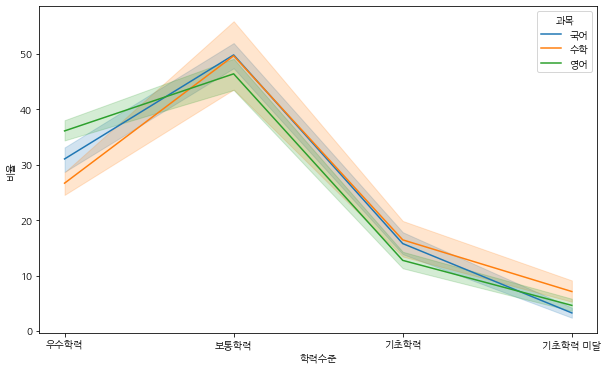

In [9]:
plt.figure(figsize=(10,6))
sns.lineplot(data=high_achieve_all, x='학력수준', y='비율', hue="과목")

Text(0.5, 1.0, '2011~2020 고등학생 학업성취도(기초학력 미달)')

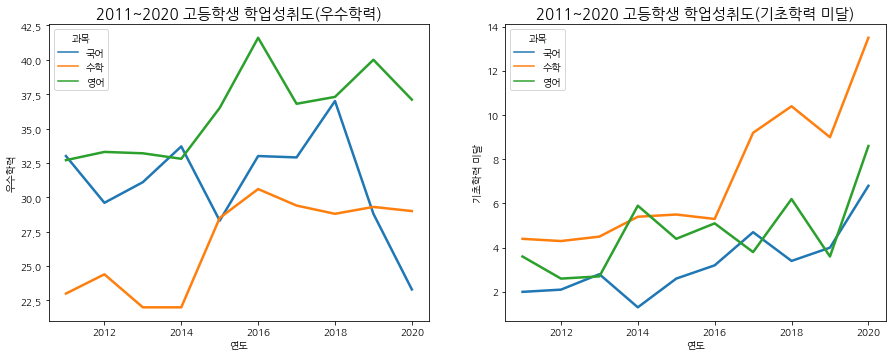

In [10]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.lineplot(data=high_grade, x='연도', y='우수학력', hue='과목',
             palette="tab10", linewidth=2.5)
plt.title('2011~2020 고등학생 학업성취도(우수학력)', fontsize=15)


plt.subplot(222)
sns.lineplot(data=high_grade, x='연도', y='기초학력 미달', hue='과목',
             palette="tab10", linewidth=2.5)
plt.title('2011~2020 고등학생 학업성취도(기초학력 미달)', fontsize=15)

Text(0.5, 1.0, '2011~2020 고등학생 학업성취도(기초이하)')

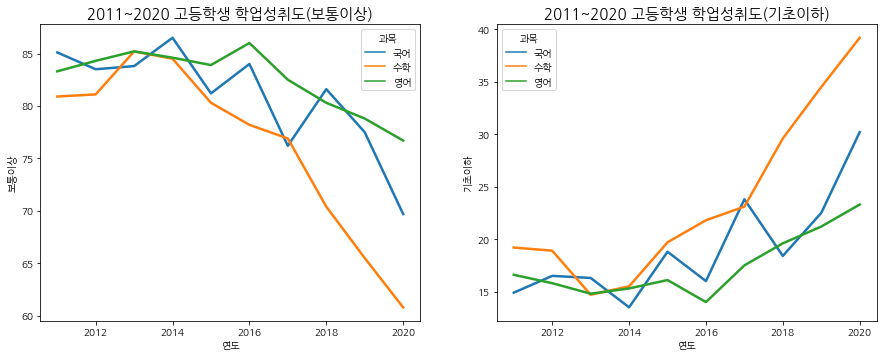

In [11]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.lineplot(data=high_grade, x='연도', y='보통이상', hue='과목',
             palette="tab10", linewidth=2.5)
plt.title('2011~2020 고등학생 학업성취도(보통이상)', fontsize=15)


plt.subplot(222)
sns.lineplot(data=high_grade, x='연도', y='기초이하', hue='과목',
             palette="tab10", linewidth=2.5)
plt.title('2011~2020 고등학생 학업성취도(기초이하)', fontsize=15)



## 2011 ~ 2020 사교육 EDA

### 지역별 1인당 월평균 사교육비
**변수명**
- region_major_mean : 2011~2020 지역별 월평균 국영수 사교육비
- seoul_major_mean : 2011~2020 서울 월평균 국영수 사교육비

In [12]:
# region_major_mean.to_csv('dataset_eda/2011~2020 지역별 월평균 국영수 사교육비.csv', index=False)
region_major_mean = pd.read_csv('dataset_eda/2011~2020 지역별 월평균 국영수 사교육비.csv')

Text(0.5, 1.0, '2011~2020 지역별 월평균 국영수 사교육비')

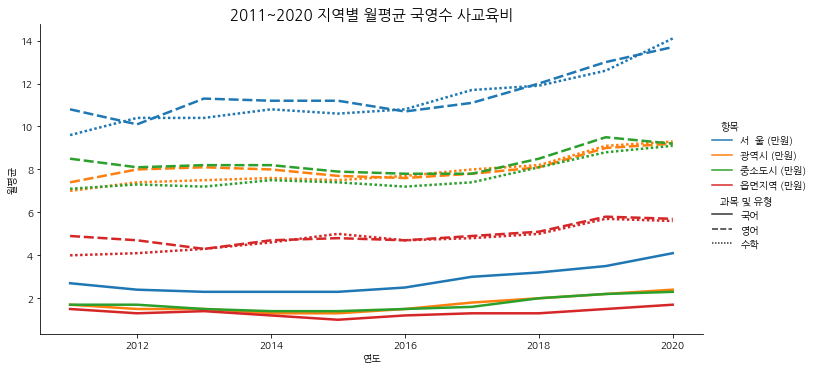

In [13]:
sns.relplot(data=region_major_mean, x='연도', y='월평균',
            hue='항목', style="과목 및 유형", kind="line", linewidth=2.5, aspect=2)
plt.title('2011~2020 지역별 월평균 국영수 사교육비', fontsize=15)


Text(0.5, 1.0, '2011~2020 서울 월평균 국영수 사교육비')

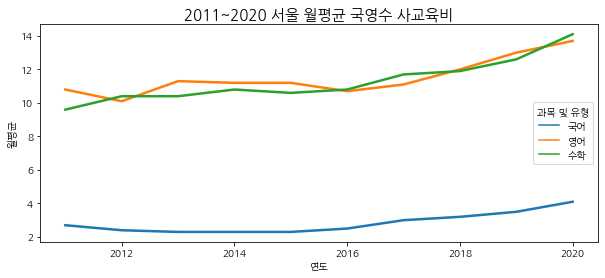

In [14]:
seoul_major_mean = region_major_mean[region_major_mean['항목'] == '서  울 (만원)']

plt.figure(figsize=(10,4))
sns.lineplot(data=seoul_major_mean, x='연도', y='월평균',
            hue='과목 및 유형', linewidth=2.5)
plt.title('2011~2020 서울 월평균 국영수 사교육비', fontsize=15)

### 전국, 서울 과목별 사교육 참여율
**변수명**
- major_ratio : 2011~2020 전국 및 서울 국영수 사교육 참여율
- seoul_major_ratio : 2011~2020 서울 국영수 사교육 참여율

In [15]:
# major_ratio.to_csv('dataset_eda/2011~2020 전국 및 서울 국영수 사교육 참여율.csv', index=False)
major_ratio = pd.read_csv('dataset_eda/2011~2020 전국 및 서울 국영수 사교육 참여율.csv')

Text(0.5, 1.0, '2011~2020 전국 및 서울 국영수 사교육 참여율')

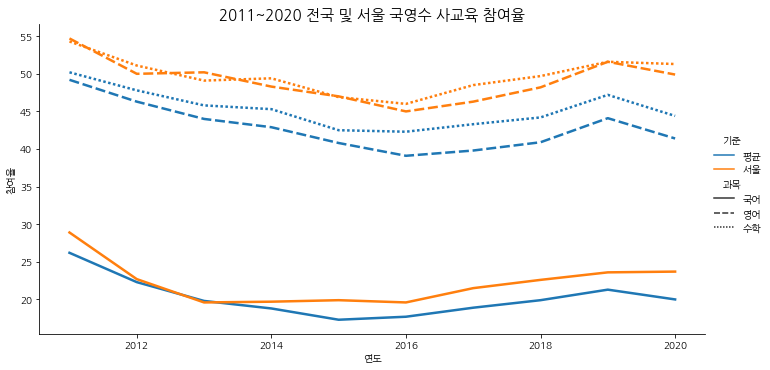

In [16]:
sns.relplot(data=major_ratio, x='연도', y='참여율',
            hue='기준', style="과목", kind="line", linewidth=2.5, aspect=2)
plt.title('2011~2020 전국 및 서울 국영수 사교육 참여율', fontsize=15)

Text(0.5, 1.0, '2011~2020 서울 국영수 사교육 참여율')

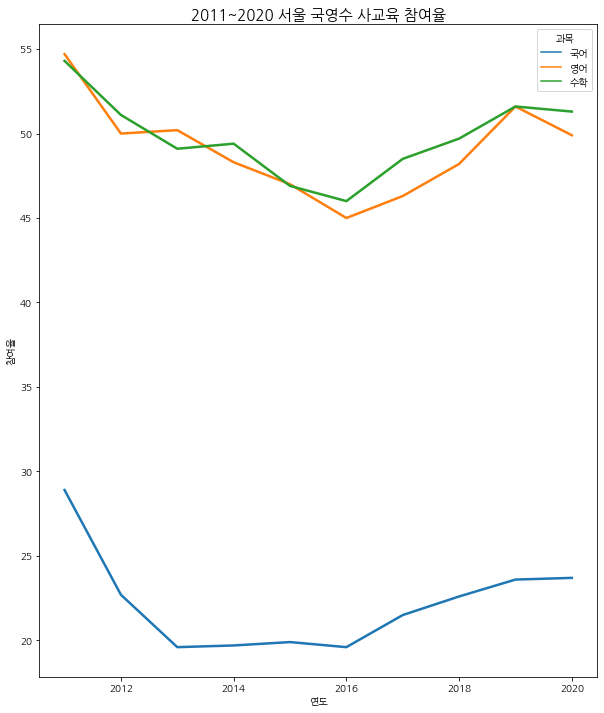

In [17]:
seoul_major_ratio = major_ratio[major_ratio['기준'] == '서울']

plt.figure(figsize=(10,12))
sns.lineplot(data=seoul_major_ratio, x='연도', y='참여율',
            hue='과목', linewidth=2.5)
plt.title('2011~2020 서울 국영수 사교육 참여율', fontsize=15)

Text(0.5, 1.0, '2011~2020 전국, 서울 영어 사교육 참여율')

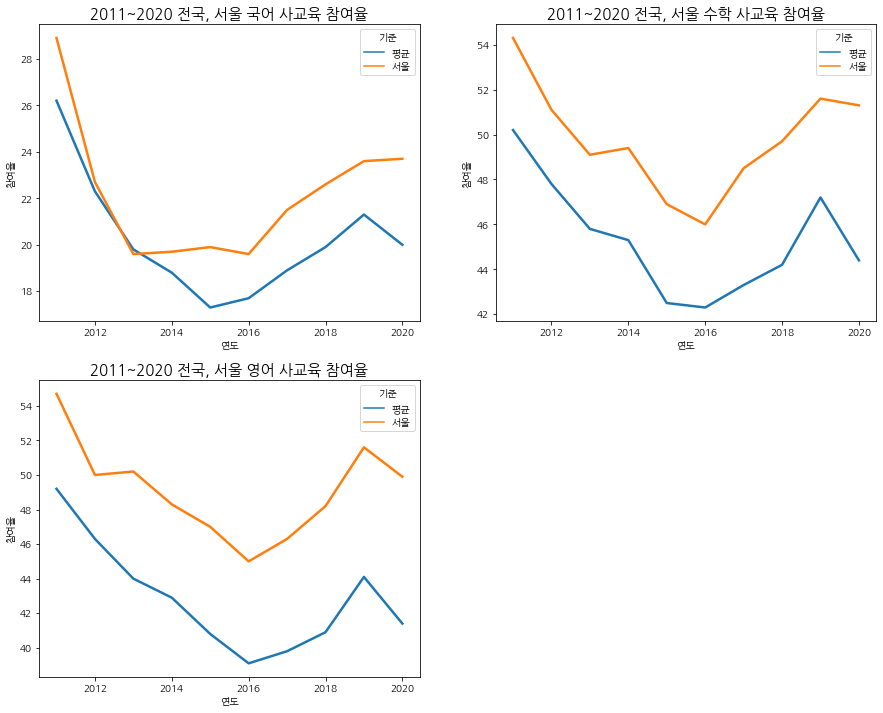

In [18]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.lineplot(data=major_ratio[major_ratio['과목']=='국어'], x='연도', y='참여율',
            hue='기준', linewidth=2.5)
plt.title('2011~2020 전국, 서울 국어 사교육 참여율', fontsize=15)

plt.subplot(222)
sns.lineplot(data=major_ratio[major_ratio['과목']=='수학'], x='연도', y='참여율',
            hue='기준', linewidth=2.5)
plt.title('2011~2020 전국, 서울 수학 사교육 참여율', fontsize=15)

plt.subplot(223)
sns.lineplot(data=major_ratio[major_ratio['과목']=='영어'], x='연도', y='참여율',
            hue='기준', linewidth=2.5)
plt.title('2011~2020 전국, 서울 영어 사교육 참여율', fontsize=15)

### 수시 정시 비율
**변수명**
- entrance : 전국 및 서울대 수시정시비율

In [19]:
# entrance.to_csv('dataset_eda/전국 및 서울대 수시정시비율.csv', index=False)
entrance = pd.read_csv('dataset_eda/전국 및 서울대 수시정시비율.csv').set_index('연도')
entrance

,정시 비율,수시 비율,서울대 수시 비율,서울대 정시 비율
연도,,,,
2011,39.1,60.9,60.8,39.2
2012,37.9,62.1,79.9,20.1
2013,37.1,62.9,82.6,17.4
2014,34.8,65.2,75.4,24.6
2015,35.8,64.2,75.6,24.4
2016,33.3,66.7,76.8,23.2
2017,30.1,69.9,78.5,21.5
2018,26.3,73.7,78.5,21.5
2019,23.8,76.2,78.5,21.5


Text(0.5, 1.0, '')

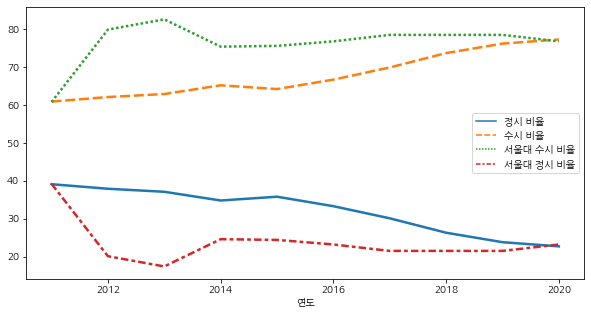

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(data=entrance, linewidth=2.5)
plt.title('')

### 서울 중고등학교 사교육비 및 사교육 참여율
**변수명**
- seoul_high_middle_privat_edu : 2011~2020 서울 중고등 사교육 참여율 및 사교육비

In [31]:
seoul_private = pd.read_csv('dataset/seoul_private.csv')

seoul_private.columns = ["연도", "1인당 월평균 사교육비(만원) : 평균", "평균 사교육 참여율(%)",
                         "1인당 월평균 사교육비(만원) : 초등학교", "초등 사교육 참여율(%)", 
                         "1인당 월평균 사교육비(만원) : 중학교", "중등 사교육 참여율(%)", 
                         "1인당 월평균 사교육비(만원) : 고등학교", "고등 사교육 참여율(%)", 
                         "1인당 월평균 사교육비(만원) : 일반고", "일반고 사교육 참여율(%)"]
seoul_private = seoul_private.drop([0, 1, 2, 13]).reset_index(drop=True)
seoul_private['연도'] = seoul_private['연도'].astype(int)
seoul_private = seoul_private.set_index('연도')
seoul_private = seoul_private.astype(float).reset_index()
seoul_private

,연도,1인당 월평균 사교육비(만원) : 평균,평균 사교육 참여율(%),1인당 월평균 사교육비(만원) : 초등학교,초등 사교육 참여율(%),1인당 월평균 사교육비(만원) : 중학교,중등 사교육 참여율(%),1인당 월평균 사교육비(만원) : 고등학교,고등 사교육 참여율(%),1인당 월평균 사교육비(만원) : 일반고,일반고 사교육 참여율(%)
0,2011,32.8,77.0,30.4,87.7,31.8,73.4,37.4,64.2,42.7,71.2
1,2012,31.2,73.5,26.1,82.0,34.0,72.7,36.1,61.8,41.1,68.2
2,2013,32.8,75.0,28.4,84.8,34.9,74.7,37.1,61.6,42.7,68.4
3,2014,33.5,74.4,30.0,84.3,34.9,73.3,37.1,61.3,42.1,67.4
4,2015,33.8,74.3,29.6,82.9,35.5,74.1,38.3,61.8,43.6,68.2
5,2016,35.2,73.7,29.9,84.2,37.0,69.9,41.7,61.5,47.0,66.7
6,2017,39.1,77.6,34.1,86.5,41.7,76.0,44.5,65.5,51.8,72.6
7,2018,41.1,79.9,36.5,89.5,41.5,74.8,48.4,68.3,56.6,74.9
8,2019,45.1,80.0,38.5,87.6,46.3,77.2,55.6,68.9,65.2,77.3
9,2020,43.3,74.6,32.7,76.6,47.5,74.9,58.6,70.7,66.9,76.6


In [36]:
seoul_high_middle_privat_edu = seoul_private[['연도', '1인당 월평균 사교육비(만원) : 평균',
                                              '평균 사교육 참여율(%)',
                                              '1인당 월평균 사교육비(만원) : 중학교',
                                              '1인당 월평균 사교육비(만원) : 고등학교',
                                              '중등 사교육 참여율(%)',
                                              '고등 사교육 참여율(%)']]
seoul_high_middle_privat_edu

,연도,1인당 월평균 사교육비(만원) : 평균,평균 사교육 참여율(%),1인당 월평균 사교육비(만원) : 중학교,1인당 월평균 사교육비(만원) : 고등학교,중등 사교육 참여율(%),고등 사교육 참여율(%)
0,2011,32.8,77.0,31.8,37.4,73.4,64.2
1,2012,31.2,73.5,34.0,36.1,72.7,61.8
2,2013,32.8,75.0,34.9,37.1,74.7,61.6
3,2014,33.5,74.4,34.9,37.1,73.3,61.3
4,2015,33.8,74.3,35.5,38.3,74.1,61.8
5,2016,35.2,73.7,37.0,41.7,69.9,61.5
6,2017,39.1,77.6,41.7,44.5,76.0,65.5
7,2018,41.1,79.9,41.5,48.4,74.8,68.3
8,2019,45.1,80.0,46.3,55.6,77.2,68.9
9,2020,43.3,74.6,47.5,58.6,74.9,70.7


In [37]:
# seoul_high_middle_privat_edu.to_csv('dataset_eda/2011~2020 서울 중고등 사교육 참여율 및 사교육비.csv', index=False)
seoul_high_middle_privat_edu = pd.read_csv('dataset_eda/2011~2020 서울 중고등 사교육 참여율 및 사교육비.csv').set_index('연도')
seoul_high_middle_privat_edu

,1인당 월평균 사교육비(만원) : 평균,평균 사교육 참여율(%),1인당 월평균 사교육비(만원) : 중학교,1인당 월평균 사교육비(만원) : 고등학교,중등 사교육 참여율(%),고등 사교육 참여율(%)
연도,,,,,,
2011,32.8,77.0,31.8,37.4,73.4,64.2
2012,31.2,73.5,34.0,36.1,72.7,61.8
2013,32.8,75.0,34.9,37.1,74.7,61.6
2014,33.5,74.4,34.9,37.1,73.3,61.3
2015,33.8,74.3,35.5,38.3,74.1,61.8
2016,35.2,73.7,37.0,41.7,69.9,61.5
2017,39.1,77.6,41.7,44.5,76.0,65.5
2018,41.1,79.9,41.5,48.4,74.8,68.3
2019,45.1,80.0,46.3,55.6,77.2,68.9


<AxesSubplot:xlabel='연도'>

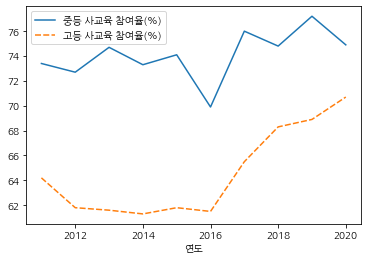

In [ ]:
sns.lineplot(data=seoul_high_middle_privat_edu[['중등 사교육 참여율(%)', '고등 사교육 참여율(%)']])

<AxesSubplot:xlabel='연도'>

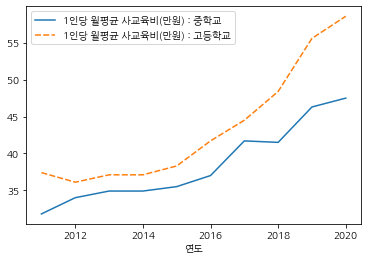

In [ ]:
sns.lineplot(data=seoul_high_middle_privat_edu[['1인당 월평균 사교육비(만원) : 중학교',
                                                '1인당 월평균 사교육비(만원) : 고등학교']])

### 상관관계

Text(0.5, 1.0, '사교육과 수시정시 비율 간의 상관관계')

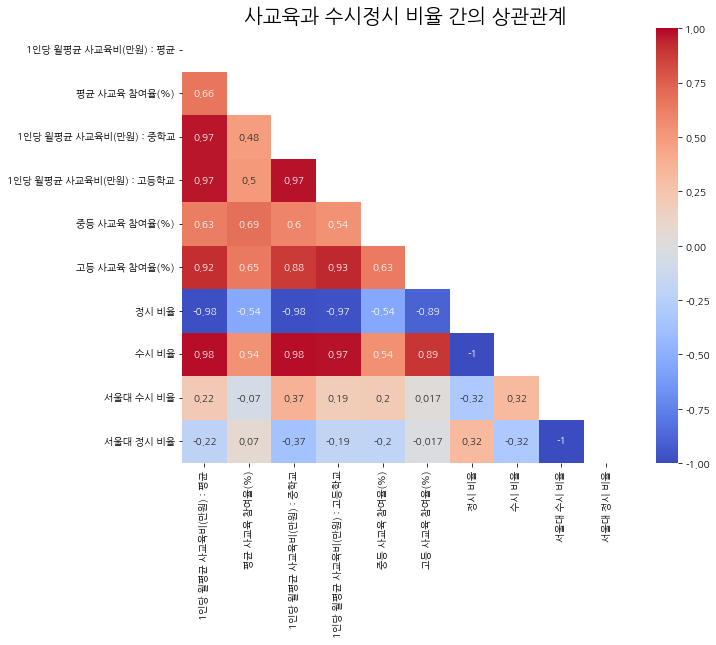

In [ ]:
privat_edu_entrance = pd.concat([seoul_high_middle_privat_edu, entrance], axis=1)

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(privat_edu_entrance.corr()))
sns.heatmap(privat_edu_entrance.corr(), annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('사교육과 수시정시 비율 간의 상관관계', fontsize=20)

Text(0.5, 1.0, '2011~2020 사교육과 수시 비율')

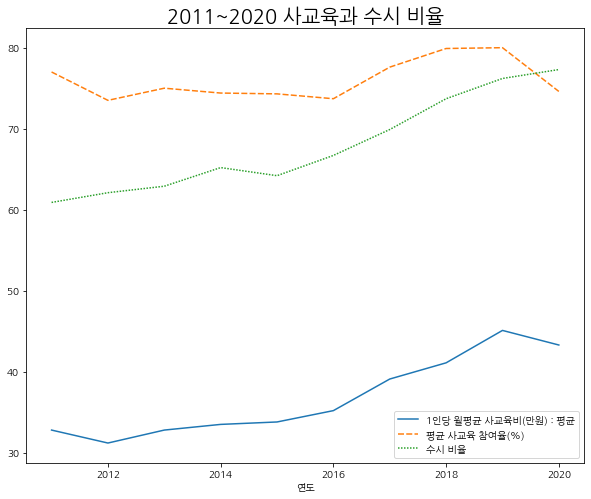

In [ ]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=privat_edu_entrance[['1인당 월평균 사교육비(만원) : 평균', '평균 사교육 참여율(%)', '수시 비율']])
plt.title('2011~2020 사교육과 수시 비율', fontsize=20)

In [ ]:
# 서울 내 국어 참여율과 월평균 비용
korean_seoul_mean =  seoul_major_mean[seoul_major_mean['과목 및 유형'] == '국어'].reset_index(drop=True)
korean_seoul_ratio = seoul_major_ratio[seoul_major_ratio['과목']=='국어'].reset_index(drop=True)
korean_seoul = pd.concat([korean_seoul_mean[['연도', '월평균']].set_index('연도'), 
                         korean_seoul_ratio[['연도', '참여율']].set_index('연도')], axis=1)

# 서울 내 수학 참여율과 월평균 비용
math_seoul_mean =  seoul_major_mean[seoul_major_mean['과목 및 유형'] == '수학'].reset_index(drop=True)
math_seoul_ratio = seoul_major_ratio[seoul_major_ratio['과목']=='수학'].reset_index(drop=True)
math_seoul = pd.concat([math_seoul_mean[['연도', '월평균']].set_index('연도'),
                        math_seoul_ratio[['연도', '참여율']].set_index('연도')], axis=1)

# 서울 내 영어 참여율과 월평균 비용
english_seoul_mean =  seoul_major_mean[seoul_major_mean['과목 및 유형'] == '영어'].reset_index(drop=True)
english_seoul_ratio = seoul_major_ratio[seoul_major_ratio['과목']=='영어'].reset_index(drop=True)
english_seoul = pd.concat([english_seoul_mean[['연도', '월평균']].set_index('연도'), 
                           english_seoul_ratio[['연도', '참여율']].set_index('연도')], axis=1)

Text(0.5, 1.0, '고등학교 국어 과목과 수시정시, 사교육의 상관관계')

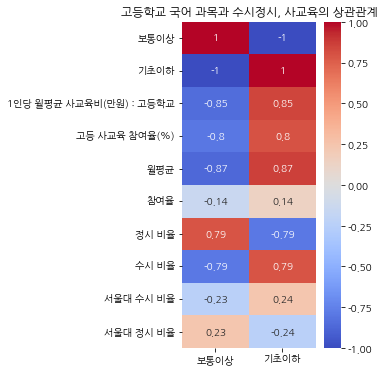

In [ ]:
korean_high_grade = high_grade[high_grade['과목']=='국어'][['연도', '보통이상', '기초이하']].set_index('연도')
korean_high_grade = pd.concat([korean_high_grade,
                               seoul_high_middle_privat_edu[['1인당 월평균 사교육비(만원) : 고등학교', 
                                                             '고등 사교육 참여율(%)']]], axis=1)
korean_high_grade = pd.concat([korean_high_grade, korean_seoul], axis=1)
korean_high_grade = pd.concat([korean_high_grade, entrance], axis=1)



plt.figure(figsize=(3, 6))
sns.heatmap(korean_high_grade.corr()[['보통이상', '기초이하']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('고등학교 국어 과목과 수시정시, 사교육의 상관관계', fontsize=12)

Text(0.5, 1.0, '고등학교 수학 과목과 수시정시, 사교육의 상관관계')

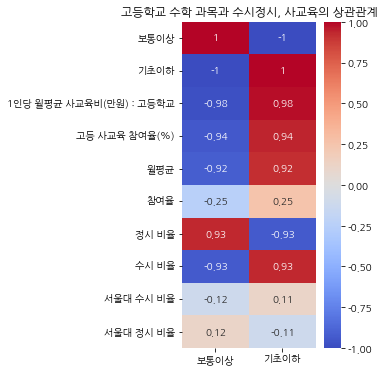

In [ ]:
math_high_grade = high_grade[high_grade['과목']=='수학'][['연도', '보통이상', '기초이하']].set_index('연도')
math_high_grade = pd.concat([math_high_grade,
          seoul_high_middle_privat_edu[['1인당 월평균 사교육비(만원) : 고등학교', '고등 사교육 참여율(%)']]],
          axis=1)
math_high_grade = pd.concat([math_high_grade, math_seoul], axis=1)
math_high_grade = pd.concat([math_high_grade, entrance], axis=1)

plt.figure(figsize=(3, 6))
sns.heatmap(math_high_grade.corr()[['보통이상', '기초이하']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('고등학교 수학 과목과 수시정시, 사교육의 상관관계', fontsize=12)

Text(0.5, 1.0, '2011~2020 고등학생 수학 성취도')

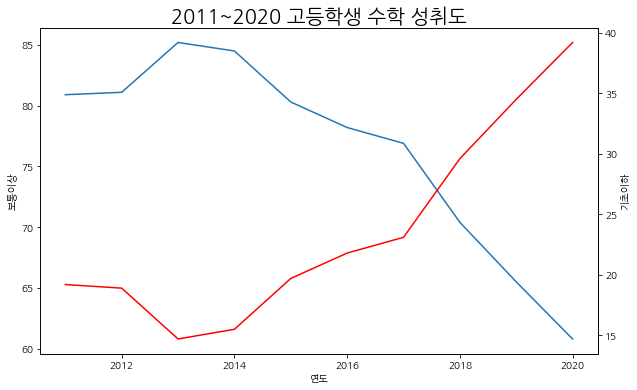

In [ ]:
plt.figure(figsize=(10, 6))
pr_p = sns.lineplot(data=math_high_grade[['보통이상', '기초이하']], 
                    x="연도", y="보통이상", palette="Blue")
pr_c = pr_p.twinx()
pr_c = sns.lineplot(data=math_high_grade[['보통이상', '기초이하']],
                    x="연도", y="기초이하", color="Red")
plt.title('2011~2020 고등학생 수학 성취도', fontsize=20)

Text(0.5, 1.0, '고등학교 영어 과목과 수시정시, 사교육의 상관관계')

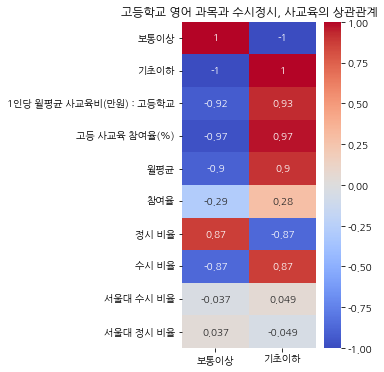

In [ ]:
english_high_grade = high_grade[high_grade['과목']=='영어'][['연도', '보통이상', '기초이하']].set_index('연도')
english_high_grade = pd.concat([english_high_grade,
          seoul_high_middle_privat_edu[['1인당 월평균 사교육비(만원) : 고등학교', '고등 사교육 참여율(%)']]],
          axis=1)
english_high_grade = pd.concat([english_high_grade, english_seoul], axis=1)
english_high_grade = pd.concat([english_high_grade, entrance], axis=1)

plt.figure(figsize=(3, 6))
sns.heatmap(english_high_grade.corr()[['보통이상', '기초이하']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('고등학교 영어 과목과 수시정시, 사교육의 상관관계', fontsize=12)

Text(0.5, 1.0, '2011~2020 고등학생 영어 성취도')

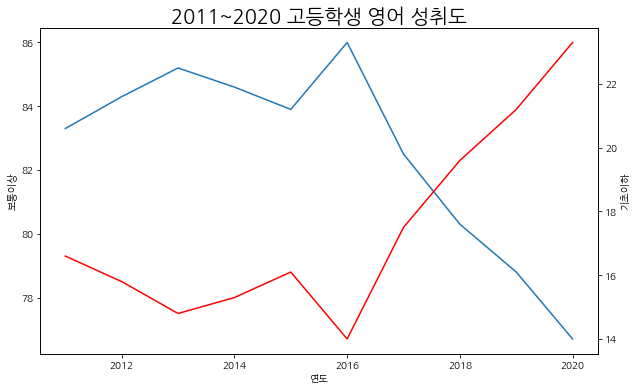

In [ ]:
plt.figure(figsize=(10, 6))
pr_p = sns.lineplot(data=english_high_grade[['보통이상', '기초이하']], 
                    x="연도", y="보통이상", palette="Blue")
pr_c = pr_p.twinx()
pr_c = sns.lineplot(data=english_high_grade[['보통이상', '기초이하']],
                    x="연도", y="기초이하", color="Red")
plt.title('2011~2020 고등학생 영어 성취도', fontsize=20)

**중학교**

Text(0.5, 1.0, '중학교 국어 과목과 수시정시, 사교육의 상관관계')

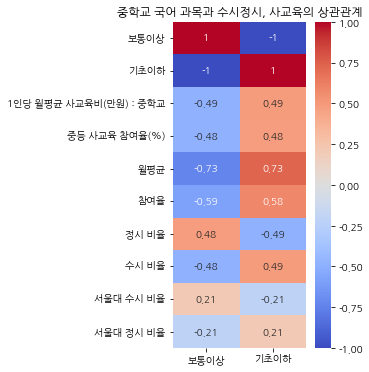

In [ ]:
korean_mid_grade = mid_grade[mid_grade['과목']=='국어'][['연도', '보통이상', '기초이하']].set_index('연도')
korean_mid_grade = pd.concat([korean_mid_grade,
                               seoul_high_middle_privat_edu[['1인당 월평균 사교육비(만원) : 중학교', 
                                                             '중등 사교육 참여율(%)']]], axis=1)
korean_mid_grade = pd.concat([korean_mid_grade, korean_seoul], axis=1)
korean_mid_grade = pd.concat([korean_mid_grade, entrance], axis=1)



plt.figure(figsize=(3, 6))
sns.heatmap(korean_mid_grade.corr()[['보통이상', '기초이하']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('중학교 국어 과목과 수시정시, 사교육의 상관관계', fontsize=12)

Text(0.5, 1.0, '중학교 수학 과목과 수시정시, 사교육의 상관관계')

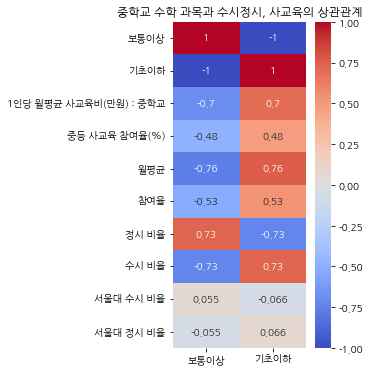

In [ ]:
math_mid_grade = mid_grade[mid_grade['과목']=='수학'][['연도', '보통이상', '기초이하']].set_index('연도')
math_mid_grade = pd.concat([math_mid_grade,
                               seoul_high_middle_privat_edu[['1인당 월평균 사교육비(만원) : 중학교', 
                                                             '중등 사교육 참여율(%)']]], axis=1)
math_mid_grade = pd.concat([math_mid_grade, math_seoul], axis=1)
math_mid_grade = pd.concat([math_mid_grade, entrance], axis=1)



plt.figure(figsize=(3, 6))
sns.heatmap(math_mid_grade.corr()[['보통이상', '기초이하']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('중학교 수학 과목과 수시정시, 사교육의 상관관계', fontsize=12)

Text(0.5, 1.0, '영어 수학 과목과 수시정시, 사교육의 상관관계')

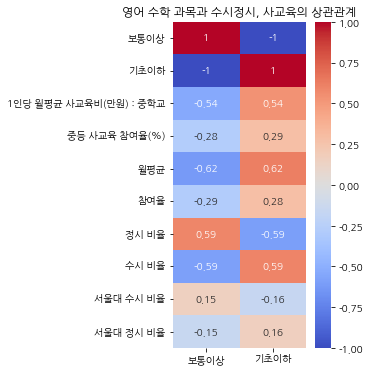

In [ ]:
english_mid_grade = mid_grade[mid_grade['과목']=='영어'][['연도', '보통이상', '기초이하']].set_index('연도')
english_mid_grade = pd.concat([english_mid_grade,
                               seoul_high_middle_privat_edu[['1인당 월평균 사교육비(만원) : 중학교', 
                                                             '중등 사교육 참여율(%)']]], axis=1)
english_mid_grade = pd.concat([english_mid_grade, math_seoul], axis=1)
english_mid_grade = pd.concat([english_mid_grade, entrance], axis=1)



plt.figure(figsize=(3, 6))
sns.heatmap(english_mid_grade.corr()[['보통이상', '기초이하']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('영어 수학 과목과 수시정시, 사교육의 상관관계', fontsize=12)